Frank Wood's UBC computer sience research group has compiled data about minecraft players which includes information about the players themselves, and about how they play the game.  One of the questions they are interesting in answering is which characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types.  I will be diving further into this question by answering which characteristics, specificaly looking at age, gender, experience, and played hours are associated with subscribing, and which ones have higher correlation comapred to the others.  In other words, can age, gender, experience, and played hours be used to predict a subscription to a game-related newsletter?

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


I loaded the tidyverse library to get access to read_csv and all the other tidyverse functions I will need.

In [2]:
players<- read_csv("players.csv")
players

sessions<- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


I read the two files I need for this project into R using read_csv.  The "players" table includes information about the players'experience (chr) described as beginner/amateur/pro/veteran, their subscription status (their hashed email (chr) which is way to identify them, played hours (dbl), name (chr), gender (chr), and age (dbl).  The "sessions" table incldes information and about the players' hashed email (chr), start time (chr), end time (chr).  The start and end times are also included in the "sessions" table in a numeric way, labelled as original start and end times (dbl).  The "players" table has 196 observations, and the "players" table has 1535 obervations. In my project, I will only be using data from the "players" dataset, and will be using all the data from it which I mentioned.

In [4]:
players_simple<- players |>
select(-hashedEmail)
players_simple

experience,subscribe,played_hours,name,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


In this step, I removed the hashed email column from the dataset as I will not need it for my analysis.

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<fct>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


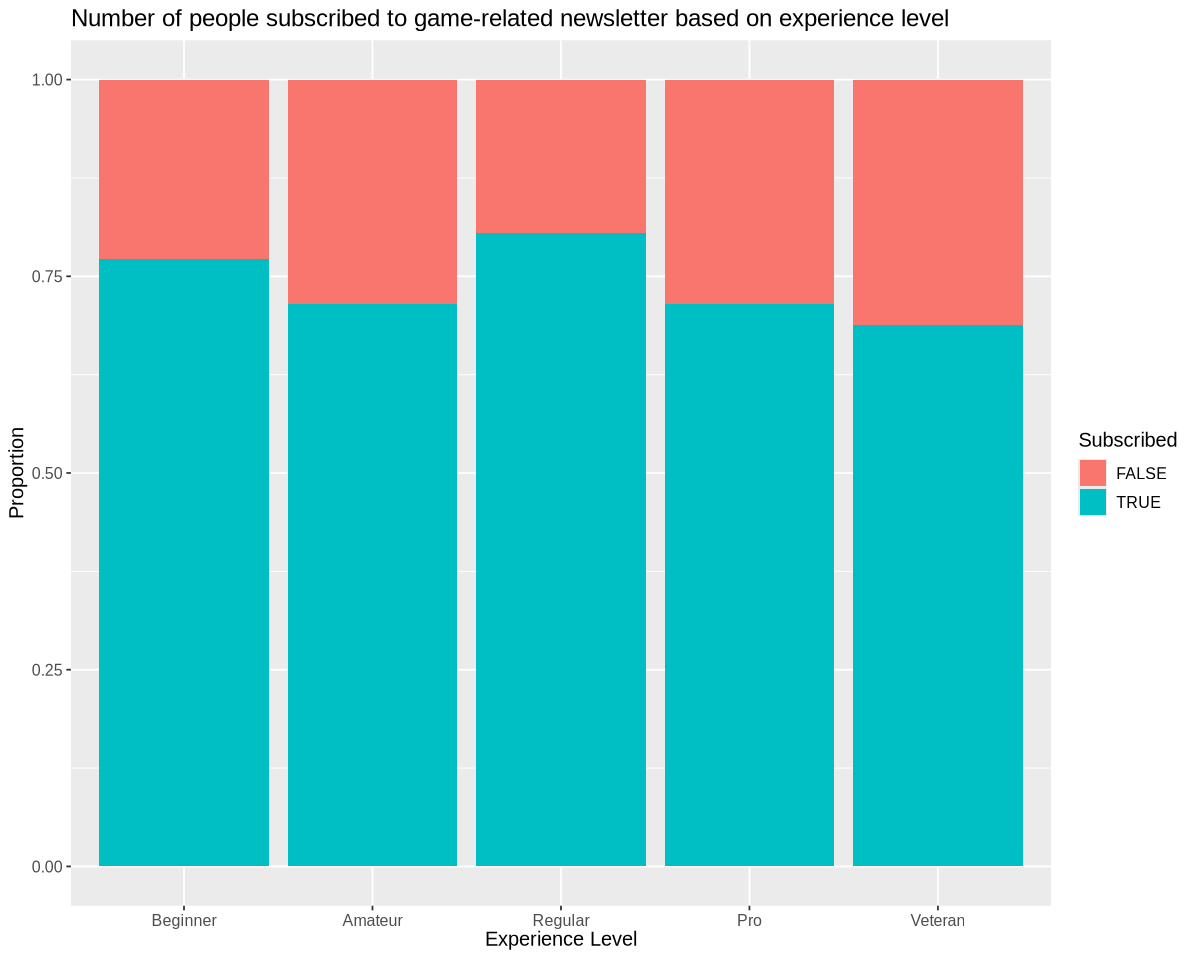

In [38]:
players_experience<- players_simple |>
select(experience, subscribe) |>
group_by(experience, subscribe) |>
summarize(count=n()) |>
mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_experience

options(repr.plot.width=10, repr.plot.height=8)
experience_plot<- players_experience |>
ggplot(aes(x=experience, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Experience Level", y="Proportion", title="Number of people subscribed to game-related newsletter based on experience level", fill="Subscribed")+
theme(text=element_text(size=12))
experience_plot

From the simplified dataset, I selected the columns "experience" and "subscribe", as I first wanted to test if experience can be used to predict if a subscription is made.  I then grouped the data by experience and by subscribe, and used summarize to get a count of how many people are or are not subscribed for each level of experience.  I then mutated the data so that it is displayed in ascending order of experience, as this would make a trend easier to visualize.  I then plotted the data into a bar plot, using experience as my x-axis categories, and proportion as my y-axis, with the colour indiciating a subscription or no subscription.  It was important to use proption, as each combination of experience and subscription had a different number of people, and these groups therefore would have been unfair to compare by count, and count would not have given any valuable insights. I also gave the plot suitable dimentions and text size.  By looking at the graph, there is not enough evidence to conclude that there is a relationshio between experience level and buying a subscription.  There is no logical trend when looking at the proportion of peope who have a subscription at each experience level as you ascend experience levels, and there is a minimal difference in proportion of subscribed individuals between all the experience levels.